### Processing raw Text Data

In [1]:
# 1. lower case
s = "This is a test"
s.lower()

'this is a test'

In [2]:
# 2. remove punctuation
import re
s = "I like! this book...."
s1 = re.sub(r"[^\w\s]", "", s)
s1

'I like this book'

In [3]:
# 3. remove stopwords
import nltk
from nltk.corpus import stopwords

In [7]:
s = "The weather is good today"
stop = stopwords.words("english")
s1 = [x for x in s.split() if x not in stop]
" ".join(s1)

'The weather good today'

In [12]:
# 4. standardize text
lookup_dict = {'nlp':'natural language processing', 'ur':'your', "wbu" : "what about you"}
def text_std(input_text):
    words = input_text.split()
    new_words = []
    for word in words:
        word = re.sub(r'[^\w\s]',"",word)
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
        new_words.append(word)    
    new_text = " ".join(new_words)
    return new_text
text_std("i like ur choice")

'i like your choice'

In [18]:
# 5. correct spelling
from textblob import TextBlob
s = "i want mroe boks like this"
s1 = TextBlob(s).correct()
str(s1)

'i want more books like this'

In [20]:
# 6. tokenize
s = "My favorite animal is cat"
nltk.word_tokenize(s)

['My', 'favorite', 'animal', 'is', 'cat']

In [22]:
# 7. stemming
s = "i eat fishes and i like fishing"
from nltk.stem import PorterStemmer
st = PorterStemmer()
[st.stem(word) for word in s.split()]

['i', 'eat', 'fish', 'and', 'i', 'like', 'fish']

In [24]:
# 8. lemmatizing
from textblob import Word
s = "leaves and leaf"
[Word(word).lemmatize() for word in s.split()]

['leaf', 'and', 'leaf']

In [27]:
# 9. compute tf
from nltk.probability import FreqDist
s = "i eat fishes and i like fishing"
frequency_dist = nltk.FreqDist(s.split())
frequency_dist

FreqDist({'i': 2, 'eat': 1, 'fishes': 1, 'and': 1, 'like': 1, 'fishing': 1})

### Convert text to features

In [28]:
import pandas as pd

In [37]:
# 1. count vectorizing
from sklearn.feature_extraction.text import CountVectorizer
text = ["I love NLP and I will learn NLP in 2month", "NLP is interesting"]
vectorizer = CountVectorizer()
vectorizer.fit(text)
vector = vectorizer.transform(text)
print(vectorizer.vocabulary_)
print(vector.toarray())
count_vect_df = pd.DataFrame(vector.todense(), columns = vectorizer.get_feature_names())
count_vect_df

{'love': 6, 'nlp': 7, 'and': 1, 'will': 8, 'learn': 5, 'in': 2, '2month': 0, 'is': 4, 'interesting': 3}
[[1 1 1 0 0 1 1 2 1]
 [0 0 0 1 1 0 0 1 0]]


,2month,and,in,interesting,is,learn,love,nlp,will
0,1,1,1,0,0,1,1,2,1
1,0,0,0,1,1,0,0,1,0


In [41]:
# 2. generate N-grams
Text = "I am learning NLP"
print(TextBlob(Text).ngrams(1))
print(TextBlob(Text).ngrams(2))
print(TextBlob(Text).ngrams(3))

[WordList(['I']), WordList(['am']), WordList(['learning']), WordList(['NLP'])]
[WordList(['I', 'am']), WordList(['am', 'learning']), WordList(['learning', 'NLP'])]
[WordList(['I', 'am', 'learning']), WordList(['am', 'learning', 'NLP'])]


In [45]:
text = ["I love NLP and I will learn NLP in 2month", "NLP is interesting"]
vectorizer = CountVectorizer(ngram_range=(2,2)) # specify "ngram_range"
vectorizer.fit(text)
vector = vectorizer.transform(text)
count_vect_df = pd.DataFrame(vector.todense(), columns = vectorizer.get_feature_names())
count_vect_df

,and will,in 2month,is interesting,learn nlp,love nlp,nlp and,nlp in,nlp is,will learn
0,1,1,0,1,1,1,1,0,1
1,0,0,1,0,0,0,0,1,0


In [78]:
# 3. generating co-occurrence matrix
from nltk import bigrams
import itertools
import numpy as np

In [79]:
def co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_to_index = { word:i for i, word in enumerate(vocab) }
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
    # Loop through the bigrams taking the current and previous word, # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_to_index[current]
        pos_previous = vocab_to_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
    # return the matrix and the index
    return co_occurrence_matrix, vocab_to_index

In [83]:
sentences = [['I', 'love', 'nlp'],
            ['I', 'love','to', 'learn'],
            ['nlp', 'is', 'future'],
            ['nlp', 'is', 'cool']]
merged = list(itertools.chain.from_iterable(sentences))
matrix= co_occurrence_matrix(merged)
CoMatrixFinal = pd.DataFrame(matrix[0], index=matrix[1], columns=matrix[1])
print(CoMatrixFinal)

        nlp  learn   to  cool  future    I  love   is
nlp     0.0    1.0  0.0   0.0     1.0  0.0   1.0  0.0
learn   0.0    0.0  1.0   0.0     0.0  0.0   0.0  0.0
to      0.0    0.0  0.0   0.0     0.0  0.0   1.0  0.0
cool    0.0    0.0  0.0   0.0     0.0  0.0   0.0  1.0
future  0.0    0.0  0.0   0.0     0.0  0.0   0.0  1.0
I       1.0    0.0  0.0   0.0     0.0  0.0   0.0  0.0
love    0.0    0.0  0.0   0.0     0.0  2.0   0.0  0.0
is      2.0    0.0  0.0   0.0     0.0  0.0   0.0  0.0


In [51]:
# 4. tf-idf matrix
Text = ["The quick brown fox jumped over the lazy dog.", "The dog.", "The fox"]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(Text)
feature_names = vectorizer.get_feature_names()
df = pd.DataFrame(tfidf_matrix.toarray(), columns = feature_names)
df

,brown,dog,fox,jumped,lazy,over,quick,the
0,0.363886,0.276745,0.276745,0.363886,0.363886,0.363886,0.363886,0.429834
1,0.000000,0.789807,0.000000,0.000000,0.000000,0.000000,0.000000,0.613356
2,0.000000,0.000000,0.789807,0.000000,0.000000,0.000000,0.000000,0.613356


In [62]:
# 5. word embeddings
# 5.1 skip gram model
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [63]:
sentences = [['I', 'love', 'nlp'],
            ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
            ['nlp', 'is', 'future'],
            ['nlp', 'saves', 'time', 'and', 'solves','lot', 'of', 'industry', 'problems'],
            ['nlp', 'uses', 'machine', 'learning']]

In [64]:
# set 1) size of the NN, 2) window size 3) minimum count of words 4) sg=1 is skip gram and 0 is cbow
skipgram = Word2Vec(sentences, size = 50, window = 3, min_count=1, sg = 1)
print(skipgram)

Word2Vec(vocab=21, size=50, alpha=0.025)


In [65]:
print(skipgram['nlp'])

[-8.5799489e-03 -8.4301895e-03  7.4237207e-04  7.8537995e-03
  7.3787910e-03 -9.3274610e-03  1.1204121e-03 -4.0870821e-03
 -1.7709507e-03 -2.0282427e-03 -1.4993815e-03  1.5522667e-03
 -9.2970980e-03 -3.6581543e-03  1.2607078e-04 -9.2226482e-04
 -6.9145579e-03 -6.7829532e-03 -5.6510870e-03 -4.4342913e-04
 -2.1808606e-03 -9.1120703e-03 -5.4762918e-03  9.0046292e-03
  3.7703735e-03  1.3879550e-03  7.7609373e-03  5.4041844e-05
 -4.5008189e-03  4.4015595e-03  1.1005123e-03 -3.6689944e-03
 -6.0762526e-03  2.1812795e-03 -1.8450655e-03  7.6539624e-03
 -2.6678161e-03 -9.7600119e-03 -7.3982854e-05  2.9143789e-03
  1.8612816e-03  6.1461702e-03 -8.6711691e-04  1.3153955e-04
  7.9416559e-04  8.2069719e-03 -6.0397303e-03  7.9617879e-05
  3.1891395e-03 -3.5302725e-03]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


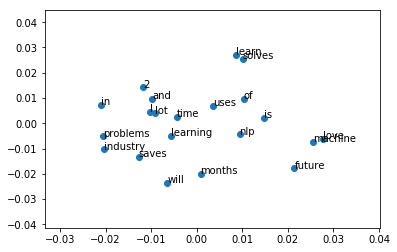

In [66]:
# T – SNE plot
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)
for i, word in enumerate(words):
       pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [67]:
# 5.2 CBOW
cbow = Word2Vec(sentences, size = 50, window = 3, min_count = 1,sg = 0)
print(cbow)
# access vector for one word
print(cbow['nlp'])

Word2Vec(vocab=21, size=50, alpha=0.025)
[-8.5799489e-03 -8.4301895e-03  7.4237207e-04  7.8537995e-03
  7.3787910e-03 -9.3274610e-03  1.1204121e-03 -4.0870821e-03
 -1.7709507e-03 -2.0282427e-03 -1.4993815e-03  1.5522667e-03
 -9.2970980e-03 -3.6581543e-03  1.2607078e-04 -9.2226482e-04
 -6.9145579e-03 -6.7829532e-03 -5.6510870e-03 -4.4342913e-04
 -2.1808606e-03 -9.1120703e-03 -5.4762918e-03  9.0046292e-03
  3.7703735e-03  1.3879550e-03  7.7609373e-03  5.4041844e-05
 -4.5008189e-03  4.4015595e-03  1.1005123e-03 -3.6689944e-03
 -6.0762526e-03  2.1812795e-03 -1.8450655e-03  7.6539624e-03
 -2.6678161e-03 -9.7600119e-03 -7.3982854e-05  2.9143789e-03
  1.8612816e-03  6.1461702e-03 -8.6711691e-04  1.3153955e-04
  7.9416559e-04  8.2069719e-03 -6.0397303e-03  7.9617879e-05
  3.1891395e-03 -3.5302725e-03]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


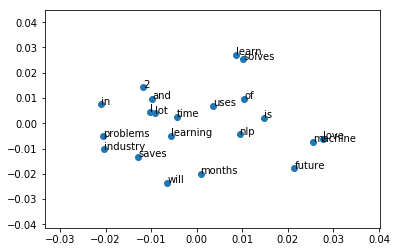

In [68]:
X = cbow[cbow.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(cbow.wv.vocab)
for i, word in enumerate(words):
       pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
# we can also use the pre-trained model
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [69]:
# 3.6 fastText
from gensim.models import FastText

In [71]:
sentences = [['I', 'love', 'nlp'],
            ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
            ['nlp', 'is', 'future'],
            ['nlp', 'saves', 'time', 'and', 'solves','lot', 'of', 'industry', 'problems'],
            ['nlp', 'uses', 'machine', 'learning']]
fast = FastText(sentences,size=20, window=1, min_count=1,
workers=5, min_n=1, max_n=2)

In [72]:
print(fast['nlp'])

[-0.00459182  0.00607472 -0.01119007  0.00555629 -0.00781679 -0.01376211
  0.00675235 -0.00840158 -0.00319737  0.00924599  0.00214165 -0.01063819
  0.01226836  0.00852781  0.01361119 -0.00257012  0.00819397 -0.00410289
 -0.0053979  -0.01360016]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [73]:
# it does appear in the corpus tho
print(fast['deep'])

[ 0.00271002 -0.00242539 -0.00771885 -0.00396854  0.0114902  -0.00640606
  0.00637542 -0.01248098 -0.01207364  0.01400793 -0.00476079 -0.00230879
  0.02009759 -0.01952532  0.01558956 -0.01581665  0.00510567 -0.00957186
 -0.00963234 -0.02059373]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
